In [186]:
# ДЗ - попробовать разные методы уменьшения размерности
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv("./heart.csv")

categorial_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

y = df[['target']]

cat_df = df.drop(continuous_features, axis=1)
cont_df = df.drop(categorial_features, axis=1)

# Сделали из категоризальных фичей их one-hot представления
onehot_encoder = OneHotEncoder(sparse=False)
onehot_features = onehot_encoder.fit_transform(cat_df)

encoded_categorical_columns = pd.DataFrame(onehot_features)
new_df = cont_df.join(encoded_categorical_columns)

c:\Users\r1233\.conda\envs\HomeTask22\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


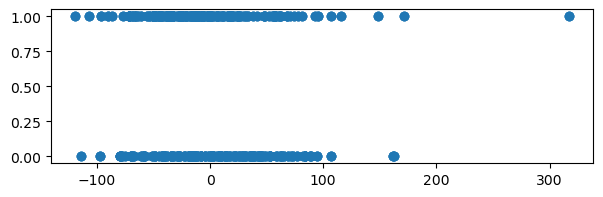

In [195]:
new_df.columns = new_df.columns.astype(str)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(new_df)
X_pca_df = pd.DataFrame(X_pca)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_pca_df)

plt.figure(figsize=(7, 2))
plt.scatter(X_pca_df, y)
plt.show()


c:\Users\r1233\.conda\envs\HomeTask22\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


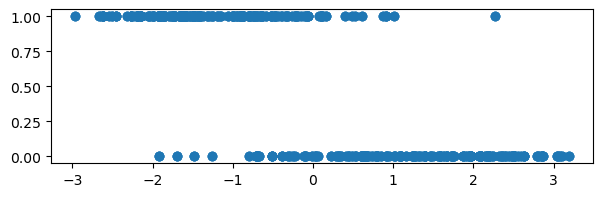

,0
0,1.332131
1,1.241225
2,1.154133
3,1.016782
4,0.776928
...,...
1020,-1.319842
1021,2.596012
1022,1.672338
1023,-1.598359


In [191]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(new_df, y)
X_lda_df = pd.DataFrame(X_lda)

# X_y_lda_df = X_lda_df.join(y)

plt.figure(figsize=(7, 2))
# plt.plot(X_y_lda_df[X_y_lda_df['target'] == 1])
# plt.plot(X_y_lda_df[X_y_lda_df['target'] == 0])
plt.scatter(X_lda_df, y)
plt.show()
X_lda_df
